In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_x_train_y.csv')

In [3]:
df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [4]:
df.dropna(subset=["Embarked"], inplace=True)

In [5]:
df.drop('Cabin', axis=1, inplace=True)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
age_imputer = SimpleImputer(strategy="median")
age_feature = ["Age"]
imputer = ColumnTransformer([("age_imputer", age_imputer, age_feature)])
filled_age = imputer.fit_transform(df)
df.Age = filled_age

In [7]:
df.drop(['Name','Ticket'], axis=1, inplace = True)

In [8]:
y = df.Survived

In [9]:
def conv_gender(data):
    boolean_gender = list()
    for i in data:
        if i == 'female':
            return 0
        else:
            return 1
def conv_embarkment(data):
    for i in data:
        if i == 'S':
            return 0
        elif i == 'Q':
            return 1
        else:
            return 0

In [10]:
df['Sex'] = df['Sex'].apply(conv_gender)
df['Embarked'] = df['Embarked'].apply(conv_embarkment)

In [11]:
x = df.drop('Survived', axis=1)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.66, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='newton-cholesky')
clf.fit(x_train, y_train)

LogisticRegression(solver='newton-cholesky')

In [16]:
y_preds = clf.predict_proba(x_test)

In [17]:
y_preds[:3]

array([[0.39616337, 0.60383663],
       [0.50160889, 0.49839111],
       [0.19994728, 0.80005272]])

In [18]:
y_predict = clf.predict(x_test)

In [19]:
y_predict[:3],y_test[:3]

(array([1, 0, 1], dtype=int64),
 661    1
 158    1
 635    1
 Name: Survived, dtype: int64)

In [20]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_predict)
conf_mat

array([[222,  37],
       [103,  79]], dtype=int64)

In [21]:
import seaborn as sns
def matrix_confusion(cf, group_names = None, categories='auto', count = True,
                    percent = True, cbar=True, xyticks=True, xyplotlabels=True,
                    sum_stats = True, figsize=None, cmap="Blues", title=None):
    """
    The function makes a pretty plot of an sklearn confusion matrix.
    Parameters:
    -----------
    cf: confusion matrix to be passed.
    
    group_names: List of strings that represents the labels row by row to be shown in each square.
    
    categories: List of strings containing the categories to be displayed on the x,y axis.
                Default is `auto`.
                
    count: If True, show the raw number in the confusion matrix. Default is True.

    normalize: If True, show the proportions for each category. Default is True.

    cbar: If True, shows the color bar. The cbar values are based off the values in the confusion
          matrix. The Default is True.

    xyticks: If True, shows x and y ticks. Default is True.

    xyplotlabels: If True, shows the `True Label` and `Predicted Label` on the figure. Default is 
                   True.

    sum_stats: If True, displays the summary statistics below the figure. Default is True.

    figsize: Tuple representing the figure size. Default will be the matplotlib rcParams values.

    cmap: Colormap of the values displayed from matplotlib.pyplot.com. Default is `Blues`.
          see: http://matplotlib.org/examples/color/colormaps_reference.html

    title: Title for the heatmap. Default is None
    """
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names) == cf.size:
        group_labels = ['{}\n'.format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks
    box_labels=[f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, 
                                                              group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS AND TEXT FOR SUMMARY STATS
    if sum_stats:

        # Accuracy: Sum of the diagonals divided by total observations.
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if `binary confusion` matrix
        if len(cf) == 2:
            precision = cf[1,1]/cf[:,1] 
            recall = cf[1,1] / cf[1,:]
            f1_score = (2*precision*recall) / (precision + recall)
            stats_text = f'''\nAccuracy = {accuracy:0.3f} \nRecall= {recall[0]:0.3f}
                            \nPrecision={precision[0]:0.3f}, \nF1 Score = {f1_score[0]:0.3f}'''
        else:
            stats_text = f"Accuracy= {accuracy:0.3f}"
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks == False:
        categories = False
    # MAKE THE HEATMAP VISUALIZATIONS
    plt.figure(figsize = figsize)
    sns.heatmap(cf, annot=box_labels,fmt="", cmap = cmap, cbar = cbar, xticklabels= categories,
               yticklabels = categories)
    if xyplotlabels:
        plt.ylabel("True label")
        plt.xlabel("Predicted label"+stats_text)
    else:
        plt.xlabel(stats_text)
    if title:
        plt.title(title)
    plt.show()

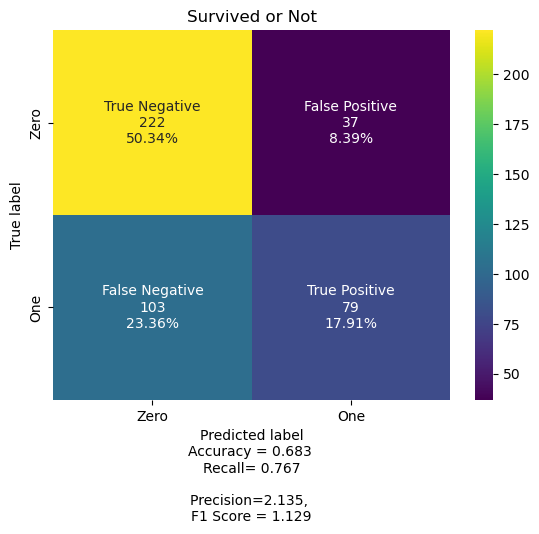

In [22]:
import seaborn as sns
labels = ['True Negative','False Positive','False Negative','True Positive']
categories=['Zero','One']
matrix_confusion(conf_mat,group_names=labels, categories=categories, title="Survived or Not",cmap='viridis')

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       259
           1       0.68      0.43      0.53       182

    accuracy                           0.68       441
   macro avg       0.68      0.65      0.65       441
weighted avg       0.68      0.68      0.67       441



# ROC CURVE

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
y_preds_positive = y_preds[:,1]
roc_auc_score(y_test,y_preds_positive)

0.7279583351011922

In [25]:
def plot_roc(fpr,tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC Curve')
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC CURVE ")
    plt.legend()

In [26]:
fpr, tpr, threshold = roc_curve(y_test, y_preds_positive)

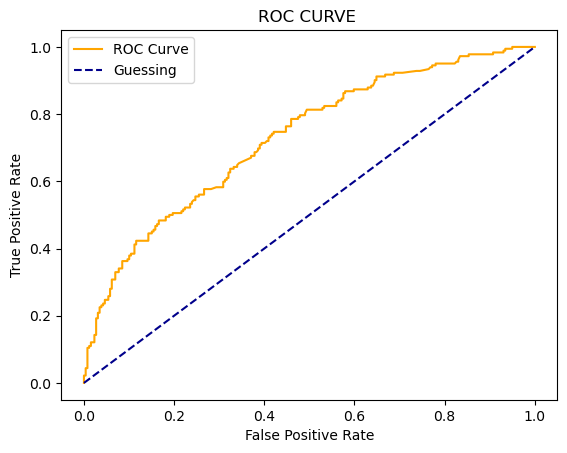

In [27]:
plot_roc(fpr,tpr)

# PREDICT DATA

In [28]:
test_data = pd.read_csv('test_x.csv')

In [29]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          45
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64

In [30]:
test_data.drop('Cabin', axis=1,inplace=True)

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy='median')
age_feature = ['Age']
imputer = ColumnTransformer([('age_imputer', age_imputer, age_feature)])
na_age = imputer.fit_transform(test_data)
test_data['Age'] = na_age

In [32]:
test_data.drop(['Name','Ticket'], axis=1, inplace=True)
test_data['Embarked'] = test_data['Embarked'].fillna('S')
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
test_data['Sex'] = test_data['Sex'].apply(conv_gender)
test_data['Embarked'] = test_data['Embarked'].apply(conv_embarkment)

In [34]:
test_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,8.0,1,1,36.7500,0
1,1,1,49.0,0,0,25.9292,0
2,3,1,27.0,0,0,7.7375,1


In [35]:
y_pred_test = clf.predict(test_data)

In [36]:
y_pred_test_probs = clf.predict_proba(test_data)

In [37]:
clf.score(test_data, y_pred_test)

1.0

In [38]:
y_pred_test_probs[:2]

array([[0.33327348, 0.66672652],
       [0.58817399, 0.41182601]])

In [39]:
np.savetxt('predictionstest.csv', y_pred_test,fmt='%.0f')